# Simple Linear regression model on Salary data

To get started we will ensure that the required libraries are available:

In [ ]:

%pip install pip --upgrade pip
%pip install numpy
%pip install pandas
%pip install scipy
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

Next we will import our various libraries. It may be necessary to add others as we run the notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.options.mode.copy_on_write = True # This will stop a warning when cleaning our data later in the notebook

## Import our data

We will now import the data from the CSV file. The column headings are in row 0.

In [2]:
df = pd.read_csv('ai_job_dataset.csv', header = 0)

Let us see what the data looks like in the data frame.
To get an overall view of the data frame we ill use the various tools pandas gives us: head(), info(), describe() and shape:

In [3]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

## Cleaning our data

In the data frame above, we have a lot of data that is not relevant to my business objective.
For example, I am not interested in the 'company_name', the 'job_id', 'posting_date' and 'application_deadline' columns amongst others.

In [5]:
df_dropped = df.drop(columns = ['job_id', 'company_name', 'posting_date', 'application_deadline'], axis=1)
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_title               15000 non-null  object 
 1   salary_usd              15000 non-null  int64  
 2   salary_currency         15000 non-null  object 
 3   experience_level        15000 non-null  object 
 4   employment_type         15000 non-null  object 
 5   company_location        15000 non-null  object 
 6   company_size            15000 non-null  object 
 7   employee_residence      15000 non-null  object 
 8   remote_ratio            15000 non-null  int64  
 9   required_skills         15000 non-null  object 
 10  education_required      15000 non-null  object 
 11  years_experience        15000 non-null  int64  
 12  industry                15000 non-null  object 
 13  job_description_length  15000 non-null  int64  
 14  benefits_score          15000 non-null

With the 'salary_currency' column, we have this in USD already and we will keep some location component so we can stick to a like-for like comparison. Since we know where the company will be paying its employees, we can convert the salary to a local figure later if necessary.

I also want to make things more specific to Version 1 and the business objective we are trying to achieve.

I believe that we are more concerned with the business location of the company,(i.e. its 'territory'), so we will keep the 'company_location' column, but since an employee will have to work from one of our offices we do not require 'employee_residence'. Version 1 also deals across industries as a consultancy so the 'industry' column can also be dropped. 

In [6]:
df_reduced = df_dropped.drop(columns = ['salary_currency', 'remote_ratio', 'employee_residence', 'required_skills', 'education_required', 'job_description_length', 'industry'], axis=1)
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_title         15000 non-null  object 
 1   salary_usd        15000 non-null  int64  
 2   experience_level  15000 non-null  object 
 3   employment_type   15000 non-null  object 
 4   company_location  15000 non-null  object 
 5   company_size      15000 non-null  object 
 6   years_experience  15000 non-null  int64  
 7   benefits_score    15000 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 937.6+ KB


We have removed some columns that aren't relevant and have kept those that will be of use.
If we compare memory usage, we have cut this approximately in half ( 2.2Mb to approx 1.1Mb)

Our reduced column data now looks like this:

In [7]:
df_reduced.describe()

,salary_usd,years_experience,benefits_score
count,15000.000000,15000.000000,15000.000000
mean,115348.965133,6.253200,7.504273
std,60260.940438,5.545768,1.450870
min,32519.000000,0.000000,5.000000
25%,70179.750000,2.000000,6.200000
50%,99705.000000,5.000000,7.500000
75%,146408.500000,10.000000,8.800000
max,399095.000000,19.000000,10.000000


In [8]:
df_reduced.shape

(15000, 8)

Having removed the irrelevant columns, we can check the data itself. We can look for Null (missing) data and duplicate entries: 

In [9]:
print("Columns    -> missing values:")
df_reduced.isnull().sum()

Columns    -> missing values:


job_title           0
salary_usd          0
experience_level    0
employment_type     0
company_location    0
company_size        0
years_experience    0
benefits_score      0
dtype: int64

In [10]:
print("Number of duplicate rows:", df_reduced.duplicated().sum())
print(df_reduced.dropna) # sanity check for missing vlues

Number of duplicate rows: 0
<bound method DataFrame.dropna of                          job_title  salary_usd experience_level  \
0            AI Research Scientist       90376               SE   
1             AI Software Engineer       61895               EN   
2                    AI Specialist      152626               MI   
3                     NLP Engineer       80215               SE   
4                    AI Consultant       54624               EN   
...                            ...         ...              ...   
14995            Robotics Engineer       38604               EN   
14996  Machine Learning Researcher       57811               EN   
14997                 NLP Engineer      189490               EX   
14998                   Head of AI       79461               EN   
14999     Computer Vision Engineer       56481               MI   

      employment_type company_location company_size  years_experience  \
0                  CT            China            M         

Looking at this latest output, we can see that there are some job titles which may not fit into our desired outcomes, for example, "robotics engineer" isn't a Version 1 job...
Let's filter on job_title:

In [11]:
included_jobs = ['AI', 'NLP', 'ML', 'Data', 'Artificial Intelligence', 'Machine Learning', 'Computer Vision', 'Deep learning']
excluded_jobs = ['Robotics']

def filter_jobs(job_title):
    job_lower = job_title.lower()
    if any(ex.lower() in job_lower for ex in excluded_jobs):
        return 'Exclude'
    if any(inc.lower() in job_lower for inc in included_jobs):
        return 'Include'
    
df_reduced['suitable_roles'] = df_reduced['job_title'].apply(filter_jobs)
df_included_jobs = df_reduced[ df_reduced['suitable_roles'] == 'Include']
df_excluded_jobs = df_reduced[ df_reduced['suitable_roles'] == 'Exclude']

print("Included job_title values:")
print(df_included_jobs['job_title'].unique())

print("Excluded job_title values:")
print(df_excluded_jobs['job_title'].unique())

df_included_jobs = df_included_jobs.drop(columns = ['job_title', 'suitable_roles'])

print(df_included_jobs.info())

Included job_title values:
['AI Research Scientist' 'AI Software Engineer' 'AI Specialist'
 'NLP Engineer' 'AI Consultant' 'AI Architect' 'Principal Data Scientist'
 'Data Analyst' 'AI Product Manager' 'Machine Learning Engineer'
 'Data Engineer' 'ML Ops Engineer' 'Head of AI' 'Deep Learning Engineer'
 'Data Scientist' 'Machine Learning Researcher' 'Computer Vision Engineer']
Excluded job_title values:
['Robotics Engineer']
<class 'pandas.core.frame.DataFrame'>
Index: 12722 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   salary_usd        12722 non-null  int64  
 1   experience_level  12722 non-null  object 
 2   employment_type   12722 non-null  object 
 3   company_location  12722 non-null  object 
 4   company_size      12722 non-null  object 
 5   years_experience  12722 non-null  int64  
 6   benefits_score    12722 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory

Looking at the company locations, we can see where they might fit with Version 1 offices, or not. I will simplify this and include Canada as 'North America', EU and scandanavian countries as 'Europe', 'India' and 'United Kingdon' will stay the same and I will include New Zealand and Australia as Australasia. 

In [12]:
office_mappings = {
    'North America': ['United States', 'US', 'USA', 'Canada'],
    'Europe': ['Germany', 'France', 'Spain', 'Austria', 'Italy', 'Netherlands', 'Sweden', 'Norway', 'Denmark', 'Iceland', 'Ireland', 'Switzerland', 'Finland'],
    'UK': ['United Kingdom', 'UK', 'Britain', 'Great Britain'],
    'India': ['India'],
    'Australasia': ['Australia', 'New Zealand'] #, 'Korea', 'S. Korea', 'South Korea', 'Singapore', 'Japan'
}

def select_office(company_location):
    for region, countries in office_mappings.items():
        if company_location.strip().title() in [c.title() for c in countries]:
            return region
    return 'no_office'

df_included_jobs['V1_office'] = df_included_jobs['company_location'].apply(select_office).copy()

df_clean = df_included_jobs[df_included_jobs['V1_office'] != 'no_office'].copy()

df_clean = df_clean.drop(columns = 'company_location')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9555 entries, 1 to 14999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   salary_usd        9555 non-null   int64  
 1   experience_level  9555 non-null   object 
 2   employment_type   9555 non-null   object 
 3   company_size      9555 non-null   object 
 4   years_experience  9555 non-null   int64  
 5   benefits_score    9555 non-null   float64
 6   V1_office         9555 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 597.2+ KB


We can do a similar pruning with employment_type as we are only interested in roles that are full-time, part-time or consultancy.

In [13]:
df_final = df_clean[df_clean['employment_type'].isin(['FT', 'FL', 'CL', 'CT'])].copy()

df_final = df_final.drop(columns = 'employment_type')

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7185 entries, 1 to 14998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   salary_usd        7185 non-null   int64  
 1   experience_level  7185 non-null   object 
 2   company_size      7185 non-null   object 
 3   years_experience  7185 non-null   int64  
 4   benefits_score    7185 non-null   float64
 5   V1_office         7185 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 392.9+ KB


Having made sure we have checked for missing or null values (which we would have removed if found), excluded some jobs that aren't in line with Version 1 capabilities, we can now see which columns produce the most unique values:

In [14]:
df_final.nunique().sort_values(ascending = True)

company_size           3
experience_level       4
V1_office              5
years_experience      20
benefits_score        51
salary_usd          7052
dtype: int64

From this, the number of most unique values is obtained from the 'salary_usd' column. We can see what the distribution of the salaries looks like:

<Axes: xlabel='salary_usd', ylabel='Count'>

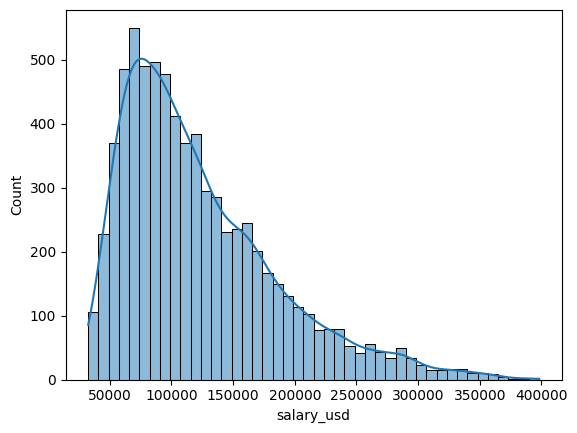

In [15]:
sb.histplot(data=df_final['salary_usd'], kde = True)

This plot suggests we might want to use the log of our salary for a better distribution.

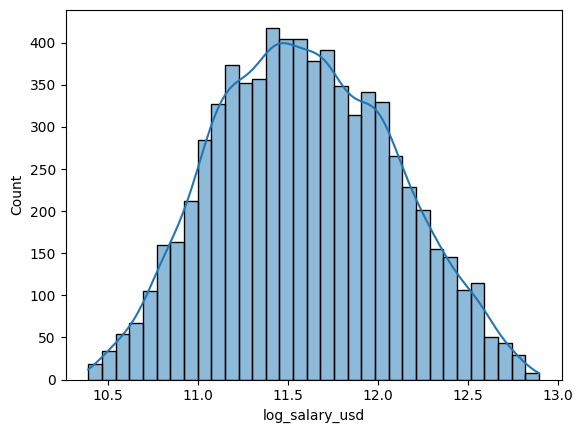

In [16]:
df_final['log_salary_usd'] = np.log1p(df_final['salary_usd'])
sb.histplot(data=df_final['log_salary_usd'], kde = True)
df_final.drop(columns = 'salary_usd', inplace = True)

While we have reduced the number of columns and reduced the number of rows to suit our needs, we still have data in our final frame that we will need to be converted from an object to a bool or numeric value. This will be done by labelling the columns and using one-hot encoding.

The columns that need changed are:
- experience_level 
- company_size 
- V1_office  

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_final['V1_office'] = le.fit_transform(df_final['V1_office'])
df_final['company_size'] = le.fit_transform(df_final['company_size'])

# One hot encoding the 'experience_level'

dummies = pd.get_dummies(df_final[['experience_level']], drop_first = True)

df_final = df_final.drop(columns='experience_level')
df_final = pd.concat([df_final, dummies], axis = 1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7185 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company_size         7185 non-null   int64  
 1   years_experience     7185 non-null   int64  
 2   benefits_score       7185 non-null   float64
 3   V1_office            7185 non-null   int64  
 4   log_salary_usd       7185 non-null   float64
 5   experience_level_EX  7185 non-null   bool   
 6   experience_level_MI  7185 non-null   bool   
 7   experience_level_SE  7185 non-null   bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 357.8 KB


Let's have a look at some relationships:

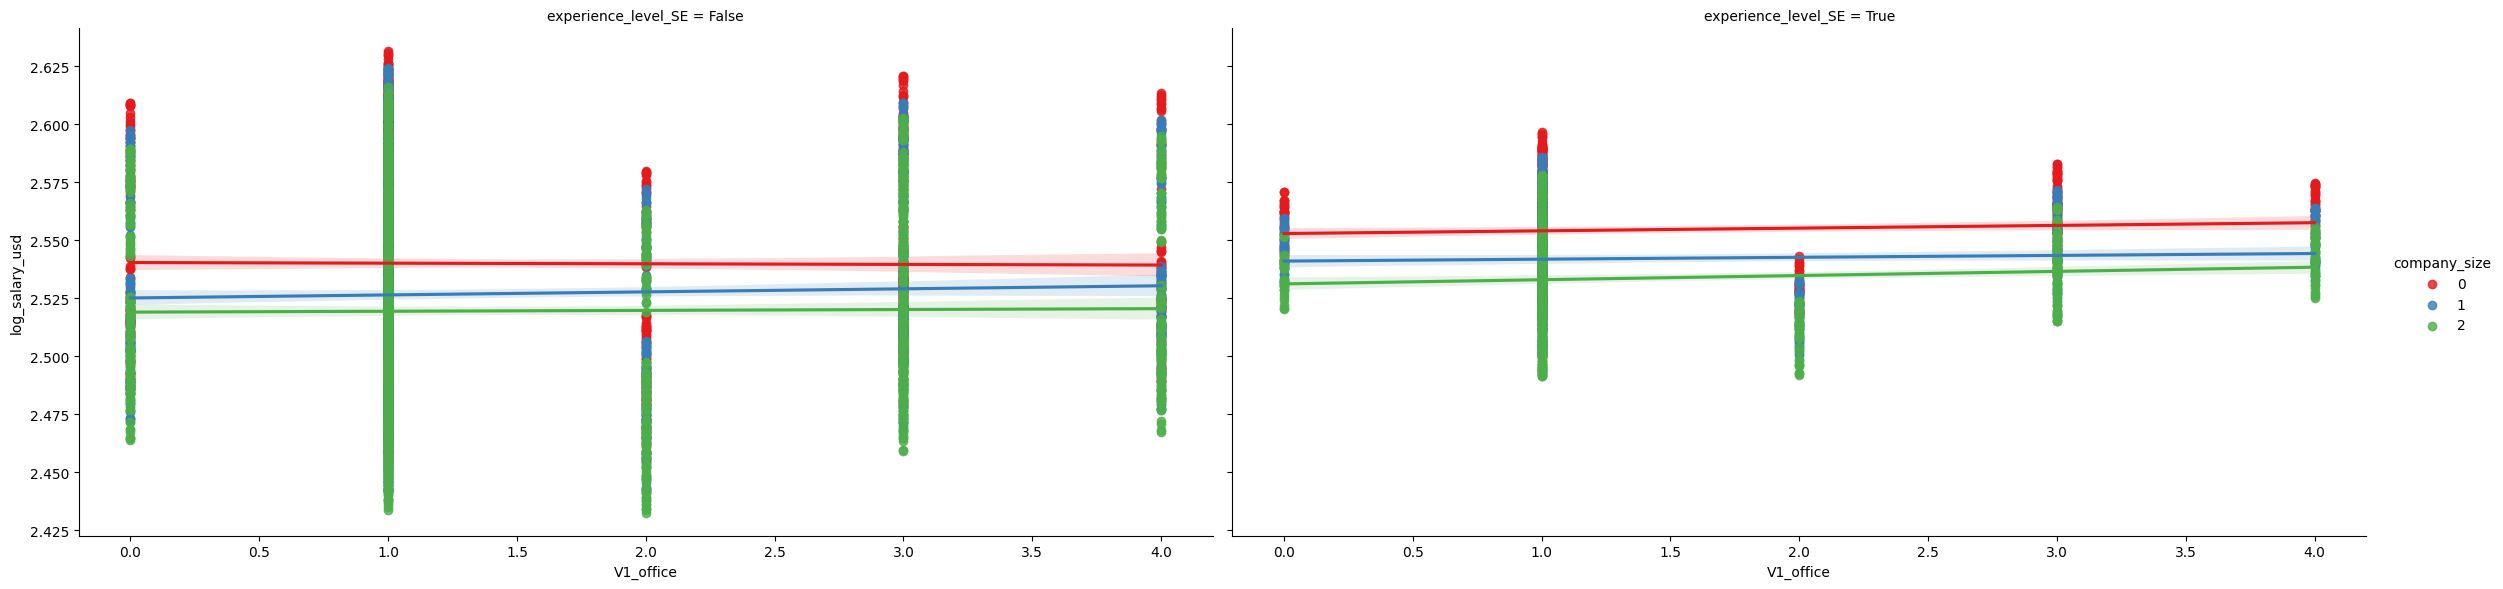

In [25]:
sb.lmplot(x='V1_office', y='log_salary_usd', data=df_final, hue='company_size', height=6, aspect=2, col='experience_level_SE', palette='Set1')

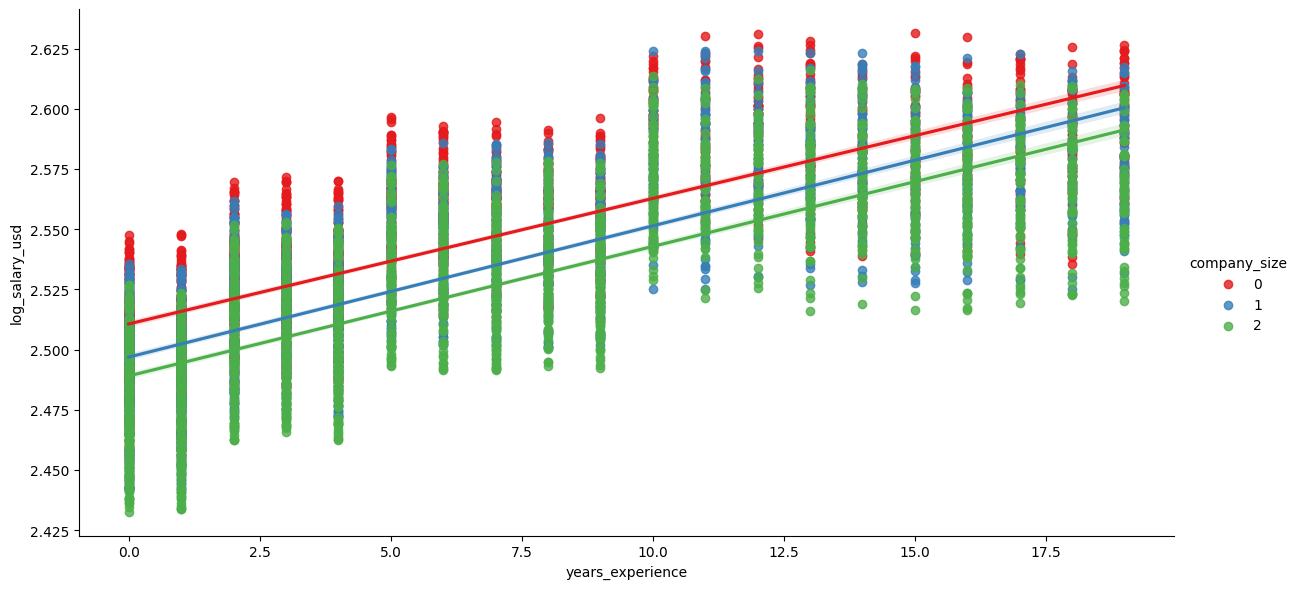

In [27]:
sb.lmplot(x='years_experience', y='log_salary_usd', data=df_final, hue='company_size', height=6, aspect=2, palette='Set1')

## Building the model

We could now create our 'X' and 'y' datasets, with 'salary_usd' being our prediction target:

We will start with a 75/25 split between training and testing data, and a random_state of 42 (From the hitchhikers guide to the galaxy)

In [28]:
from sklearn.model_selection import train_test_split
y = df_final['log_salary_usd']
X = df_final.drop(columns=['log_salary_usd'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5388, 7)
y_train shape: (5388,)
X_test shape: (1797, 7)
y_test shape: (1797,)


Lets add a correlation map. 1 = perfect correlation, 0 means no correlation:

<Axes: >

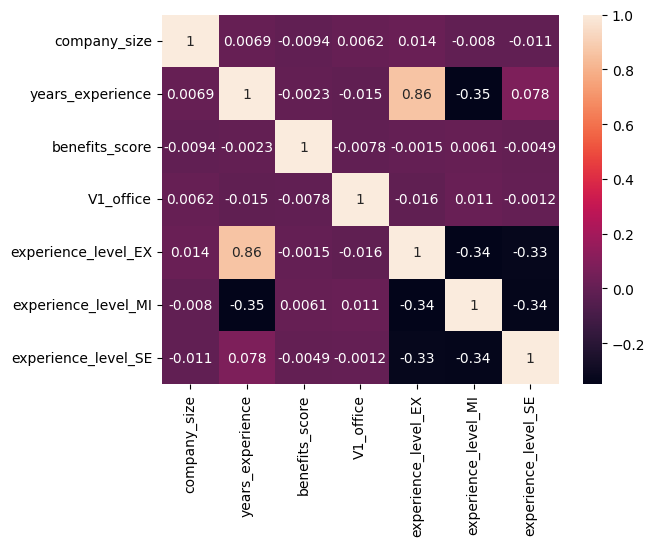

In [29]:
corr_mat = X_train.corr()
sb.heatmap(corr_mat, annot = True)

To be fair, this isn't telling us a lot. However, this is a first iteration.

And now we will create a simple linear regression model:

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Model coefficients: [-0.01028884 -0.00022514 -0.00034333  0.00112187  0.08833755  0.02686703
  0.05473017]
R2 score: 0.7068009210616732
R2 score : 0.7170044599524181 , MAE: 0.017561041377736505
count    7185.000000
mean        1.261982
std         0.011034
min         1.233348
25%         1.253745
50%         1.261851
75%         1.270265
max         1.289642
Name: log_salary_usd, dtype: float64
Mean Salary is:  1.261981606033997
Relative MAE: 0.6931%
True R2 score : 0.7174839354968836 ,True MAE: 0.22134740733238606


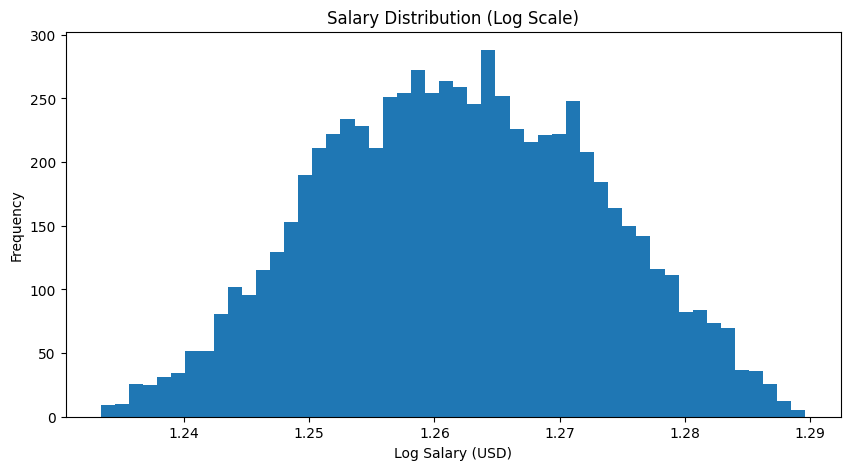

In [31]:
print("Model coefficients:", model.coef_)
print("R2 score:", model.score(X_train, y_train))

y_predict = model.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error

print(f'R2 score : {r2_score(y_true=y_test,y_pred=y_predict)} , MAE: {mean_absolute_error(y_test,y_predict)}')

df_final['log_salary_usd'] = np.log1p(df_final['log_salary_usd'])
print(df_final['log_salary_usd'].describe())
df_final['log_salary_usd'].plot(kind='hist', bins=50, figsize=(10, 5), title='Salary Distribution (Log Scale)', xlabel='Log Salary (USD)', ylabel='Frequency')
print("Mean Salary is: ", df_final['log_salary_usd'].mean())

relative_mae = (mean_absolute_error(y_test, y_predict) / y_test.mean())*100
print(f'Relative MAE: {relative_mae:.4f}%')

true_y_predict=np.expm1(y_predict)
true_y_test=np.expm1(y_test)
print(f'True R2 score : {r2_score(y_true=true_y_test,y_pred=true_y_predict)} ,True MAE: {mean_absolute_error(true_y_test,true_y_predict)}')


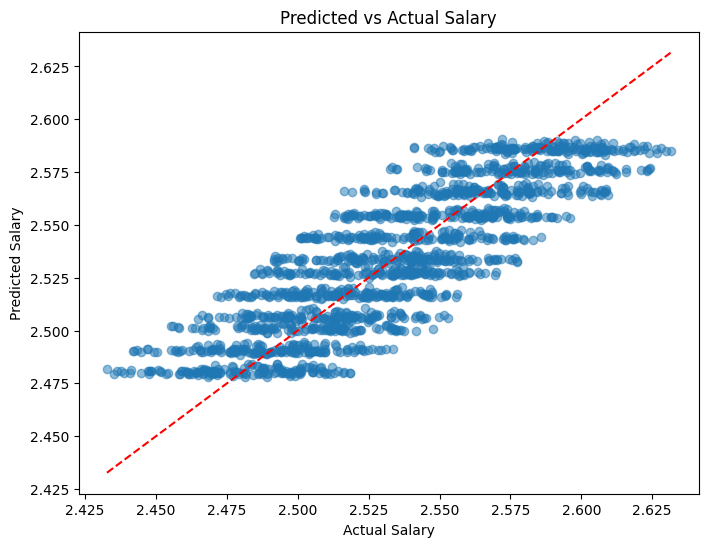

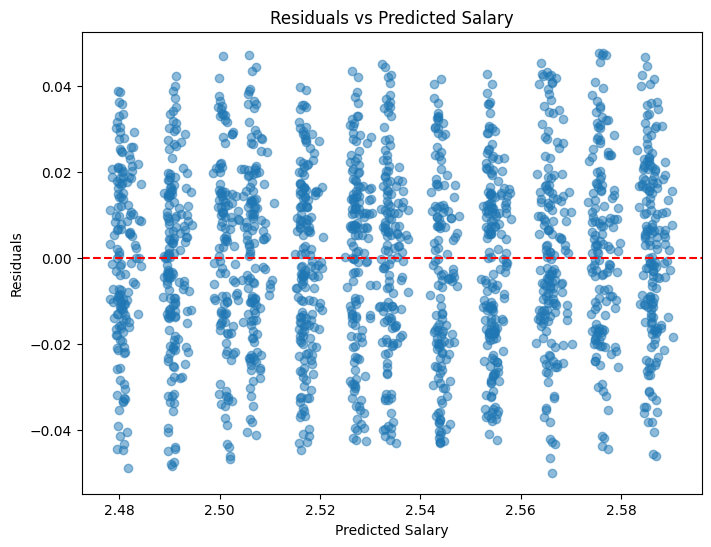

In [32]:
# 1. Predicted vs Actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_predict, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Predicted vs Actual Salary')
plt.show()

# 2. Residuals Plot
residuals = y_test - y_predict
plt.figure(figsize=(8,6))
plt.scatter(y_predict, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Salary')
plt.show()